# WeatherPy
----

### Analysis
- As our latitude approaches 0 degrees, max temperature increases.
    - The northern hemisphere is slightly warmer than the southern this time of year.
- There is not a strong correlation between the latitude of a city and its wind speed.
- There is not a strong correlation between the latitude of a city and its humidity. 
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

621


In [3]:
# create empty lists
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# establish base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# establish unit of measurement
units = "imperial"

# set counters equal to default values
record_counter = 0
set_counter = 1


print("Beginning Data Retrieval\n-----------------------------")
# loop to request data and populate empty lists
for city in cities:
    city_name = city
    record_counter = record_counter + 1
    # keep log of requests
    print(f"Processing Record {record_counter} of Set {set_counter} | {city_name}")
    # build url
    weather_data = f"{base_url}q={city_name}&appid={api_key}&units={units}"
    response = requests.get(weather_data).json()

    # append data to empty lists and error management
    try:
        City.append(response["name"].lower())
    except KeyError:
        print(f"{city_name} not found. Skipping...")
        continue
    
    try:
        Cloudiness.append(response["clouds"]["all"])
    except KeyError:
        print(f"Cannot find cloudiness for {city_name}. Skipping...")
        continue
        
    try:
        Country.append(response["sys"]["country"])
    except KeyError:
        print(f"Cannot find country for {city_name}. Skipping...")
        continue
        
    try:
        Date.append(response["dt"])
    except KeyError:
        print(f"Cannot find date for {city_name}. Skipping...")
        continue
    
    try:
        Humidity.append(response["main"]["humidity"])
    except KeyError:
        print(f"Cannot find humidity for {city_name}. Skipping...")
        continue
        
    try:
        Lat.append(response["coord"]["lat"])
    except KeyError:
        print(f"Cannot find latitude for {city_name}. Skipping...")
        continue

    try:
        Lng.append(response["coord"]["lon"])
    except KeyError:
        print(f"Cannot find longitude for {city_name}. Skipping...")
        continue

    try:
        Max_Temp.append(response["main"]["temp_max"])
    except KeyError:
        print(f"Cannot find max temperature for {city_name}. Skipping...")
        continue
    
    try:
        Wind_Speed.append(response["wind"]["speed"])
    except KeyError:
        print(f"Cannot find wind speed for {city_name}. Skipping...")
        continue
        
    if record_counter == 50:
        set_counter = set_counter + 1
        record_counter = 0
        time.sleep(60)
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kaeo
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | lasa
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | port augusta
Processing Record 8 of Set 1 | caravelas
Processing Record 9 of Set 1 | nazarovo
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | honningsvag
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | cancun
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | erdenet
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | zhezkazgan
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | correntina
Processing Record 22 of Set 1 | victoria
Processing Record 23 of Set 1 | lo

Processing Record 33 of Set 4 | okhotsk
Processing Record 34 of Set 4 | ojinaga
Processing Record 35 of Set 4 | katsuura
Processing Record 36 of Set 4 | selikhino
Processing Record 37 of Set 4 | samarai
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | vilela
Processing Record 40 of Set 4 | kurumkan
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | aquiraz
Processing Record 43 of Set 4 | bryan
Processing Record 44 of Set 4 | gerash
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | labutta
labutta not found. Skipping...
Processing Record 48 of Set 4 | paradwip
paradwip not found. Skipping...
Processing Record 49 of Set 4 | umzimvubu
umzimvubu not found. Skipping...
Processing Record 50 of Set 4 | wewak
Processing Record 1 of Set 5 | taolanaro
taolanaro not found. Skipping...
Processing Record 2 of Set 5 | suba
Processing Record 3 of Set 5 | pacific grove
P

Processing Record 15 of Set 8 | peniche
Processing Record 16 of Set 8 | rivera
Processing Record 17 of Set 8 | zhanakorgan
Processing Record 18 of Set 8 | messina
Processing Record 19 of Set 8 | waddan
Processing Record 20 of Set 8 | tsiroanomandidy
Processing Record 21 of Set 8 | pevek
Processing Record 22 of Set 8 | black river
Processing Record 23 of Set 8 | kirakira
Processing Record 24 of Set 8 | katherine
Processing Record 25 of Set 8 | karangampel
Processing Record 26 of Set 8 | russell
Processing Record 27 of Set 8 | loikaw
Processing Record 28 of Set 8 | tsienyane
tsienyane not found. Skipping...
Processing Record 29 of Set 8 | shubarshi
Processing Record 30 of Set 8 | ugoofaaru
Processing Record 31 of Set 8 | olinda
Processing Record 32 of Set 8 | george
Processing Record 33 of Set 8 | quime
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | antri
antri not found. Skipping...
Processing Record 36 of Set 8 | khasan
Processing Record 37 of Set 8 | naze
Process

Processing Record 49 of Set 11 | baghdad
Processing Record 50 of Set 11 | ponta delgada
Processing Record 1 of Set 12 | toora-khem
Processing Record 2 of Set 12 | selenduma
Processing Record 3 of Set 12 | juli
Processing Record 4 of Set 12 | kalmunai
Processing Record 5 of Set 12 | tupik
Processing Record 6 of Set 12 | erenhot
Processing Record 7 of Set 12 | rudbar
rudbar not found. Skipping...
Processing Record 8 of Set 12 | vangaindrano
Processing Record 9 of Set 12 | vanimo
Processing Record 10 of Set 12 | basco
Processing Record 11 of Set 12 | miami
Processing Record 12 of Set 12 | kieta
Processing Record 13 of Set 12 | nokaneng
Processing Record 14 of Set 12 | shushenskoye
Processing Record 15 of Set 12 | sai buri
Processing Record 16 of Set 12 | falealupo
falealupo not found. Skipping...
Processing Record 17 of Set 12 | saint-joseph
Processing Record 18 of Set 12 | robertsport
Processing Record 19 of Set 12 | duz
duz not found. Skipping...
Processing Record 20 of Set 12 | siparia

### Convert Raw Data to DataFrame

In [4]:
# convert raw data into dataframe
weather_df = pd.DataFrame(list(zip( City,
                                    Cloudiness,
                                    Country,
                                    Date,
                                    Humidity,
                                    Lat,
                                    Lng,
                                    Max_Temp,
                                    Wind_Speed)),
                          columns = ["City",
                                    "Cloudiness",
                                    "Country",
                                    "Date",
                                    "Humidity",
                                    "Lat",
                                    "Lng",
                                    "Max_Temp",
                                    "Wind_Speed"])

# export city data as csv
weather_df.to_csv("city_weather_data.csv", index = False)

# count fields to ensure congruency
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max_Temp      551
Wind_Speed    551
dtype: int64

#### Latitude vs. Temperature Plot

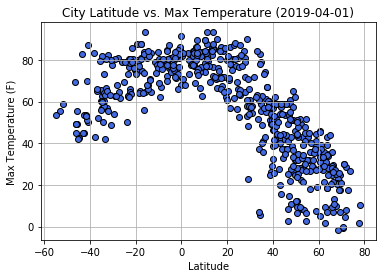

In [5]:
# plot variables
x = weather_df.Lat
y = weather_df.Max_Temp
c = "royalblue"

# build scatter plots
plt.scatter(x,
            y,
            color = c,
            linewidths = 1,
            edgecolors = "black",
            )

# graph properties
dt = datetime.date.today()
plt.title (f"City Latitude vs. Max Temperature ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_MaxTemp.png", bbox_inches = 'tight')

# Display Figure
plt.show()

#### Latitude vs. Humidity Plot

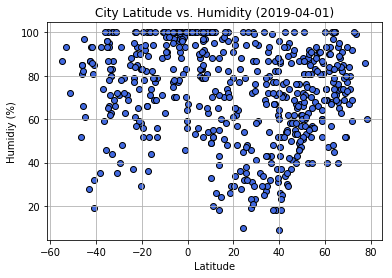

In [6]:
# plot variables
x = weather_df.Lat
y = weather_df.Humidity
c = "royalblue"

# build scatter plots
plt.scatter(x,
            y,
            color = c,
            linewidths = 1,
            edgecolors = "black",
            )

# graph properties
dt = datetime.date.today()
plt.title (f"City Latitude vs. Humidity ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidiy (%)")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_Humidity.png", bbox_inches = 'tight')

# Display Figure
plt.show()

In [14]:
# print first ten rows of dataframe
# weather_df.head(10)
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,kaeo,20,NZ,1554147484,96,-35.10,173.78,60.01,10.80
1,bredasdorp,80,ZA,1554148327,95,-34.53,20.04,62.44,9.01
2,carnarvon,0,ZA,1554148111,35,-30.97,22.13,48.94,12.37
3,lasa,40,CY,1554147978,87,34.92,32.53,55.40,2.24
4,dunedin,0,NZ,1554148298,66,-45.87,170.50,48.99,11.01
5,rikitea,0,PF,1554148328,100,-23.12,-134.97,76.48,15.39
6,port augusta,0,AU,1554148016,87,-32.49,137.76,57.00,5.82
7,caravelas,12,BR,1554148328,100,-17.73,-39.27,80.98,12.15
8,nazarovo,12,RU,1554148328,73,56.01,90.42,18.25,2.98
9,butaritari,56,KI,1554148328,100,3.07,172.79,83.50,11.25


#### Latitude vs. Cloudiness Plot

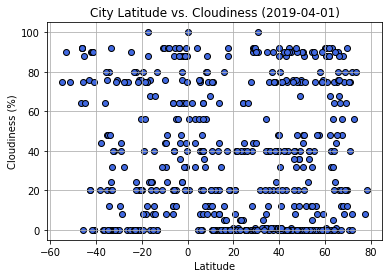

In [8]:
# plot variables
x = weather_df.Lat
y = weather_df.Cloudiness
c = "royalblue"

# build scatter plots
plt.scatter(x,
            y,
            color = c,
            linewidths = 1,
            edgecolors = "black",
            )

# graph properties
dt = datetime.date.today()
plt.title (f"City Latitude vs. Cloudiness ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_Cloudiness.png", bbox_inches = 'tight')

# Display Figure
plt.show()

#### Latitude vs. Wind Speed Plot

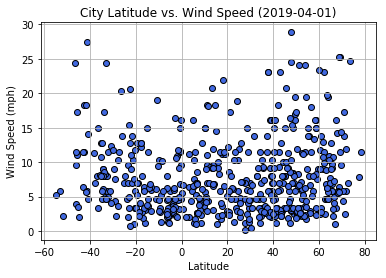

In [9]:
# plot variables
x = weather_df.Lat
y = weather_df.Wind_Speed
c = "royalblue"

# build scatter plots
plt.scatter(x,
            y,
            color = c,
            linewidths = 1,
            edgecolors = "black",
            )

# graph properties
dt = datetime.date.today()
plt.title (f"City Latitude vs. Wind Speed ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_WindSpeed.png", bbox_inches = 'tight')

# Display Figure
plt.show()